R^2 score = 0.9850659580227129


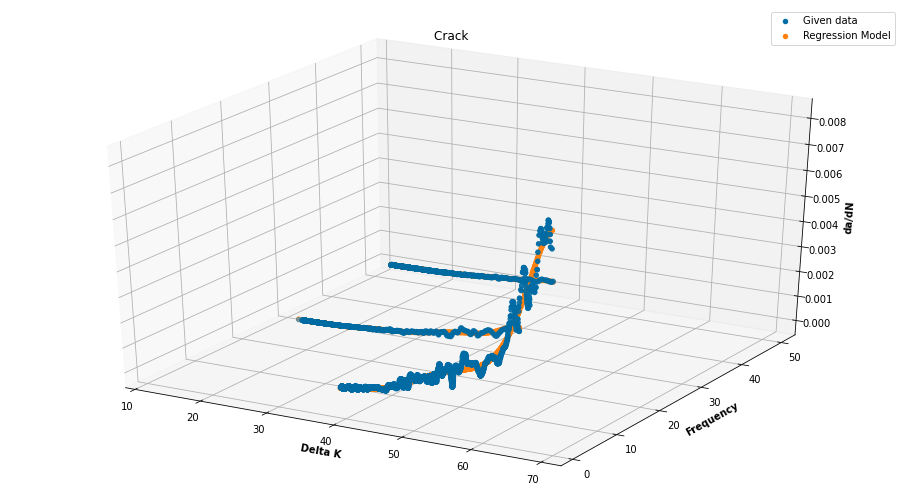

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


plt.style.use('tableau-colorblind10')
df = pd.read_csv("crackgrowth.csv", header = 0,names = ["1","2","dadN","4","5","6","7","8","9","10","11","12","delK","14","15","16","17","18","19","Freq","21","22","23","24","25","26","27","28","29"],usecols = ['dadN','delK','Freq'])

X = df[['delK','Freq']]
y = df[['dadN']]

poly_reg = PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size = 0.2)
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)
score_train = pol_reg.score(X_train, y_train)
score_test = pol_reg.score(X_test, y_test)


h=[1,df.delK,df.Freq,df.delK**2,df.delK*df.Freq,df.Freq**2,df.delK**3,df.delK**2*df.Freq,df.delK*df.Freq**2,df.Freq**3,df.delK**4,df.delK**3*df.Freq,df.delK**2*df.Freq**2,df.delK*df.Freq**3,df.Freq**4,df.delK**5,df.delK**4*df.Freq,df.delK**3*df.Freq**2,df.delK**2*df.Freq**3,df.delK*df.Freq**4,df.Freq**5,df.delK**6,df.delK**5*df.Freq,df.delK**4*df.Freq**2,df.delK**3*df.Freq**3,df.delK**2*df.Freq**4,df.delK*df.Freq**5,df.Freq**6,df.delK**7,df.delK**6*df.Freq,df.delK**5*df.Freq**2,df.delK**4*df.Freq**3,df.delK**3*df.Freq**4,df.delK**2*df.Freq**5,df.delK*df.Freq**6,df.Freq**7,df.delK**8,df.delK**7*df.Freq,df.delK**6*df.Freq**2,df.delK**5*df.Freq**3,df.delK**4*df.Freq**4,df.delK**3*df.Freq**5,df.delK**2*df.Freq**6,df.delK*df.Freq**7,df.Freq**8,df.delK**9,df.delK**8*df.Freq,df.delK**7*df.Freq**2,df.delK**6*df.Freq**3,df.delK**5*df.Freq**4,df.delK**4*df.Freq**5,df.delK**3*df.Freq**6,df.delK**2*df.Freq**7,df.delK*df.Freq**8,df.Freq**9,df.delK**10,df.delK**9*df.Freq,df.delK**8*df.Freq**2,df.delK**7*df.Freq**3,df.delK**6*df.Freq**4,df.delK**5*df.Freq**5,df.delK**4*df.Freq**6,df.delK**3*df.Freq**7,df.delK**2*df.Freq**8,df.delK*df.Freq**9,df.Freq**10]

fx=pol_reg.intercept_[0]
for i in range(len(h)):
    fx = fx+ h[i]*pol_reg.coef_[0][i]
    
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
 

sctt = ax.scatter3D( df.delK,df.Freq, df.dadN,label= 'Given data')
ax.set_xlabel('Delta K', fontweight ='bold')
ax.set_ylabel('Frequency', fontweight ='bold')
ax.set_zlabel('da/dN', fontweight ='bold')
ax.scatter(df.delK,df.Freq,fx,label='Regression Model')
ax.set_title('Crack ')
ax.legend()
print("R^2 score =",score_test)
plt.show()


